In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
# Loading dataset using pandas 
df = pd.read_csv('user_behavior_dataset.csv', index_col = 'User ID')
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
User ID,,,,,,,,,,
1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
# Number of rows and columns of dataset
df.shape

(700, 10)

In [4]:
# Some basic statistics
df.describe()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [5]:
# checking for empty values
df.isnull().sum()

Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [6]:
# Counting number of duplicate rows
df.duplicated().sum()

0

In [7]:
# Selecting Numeric columns
numeric_df = df.select_dtypes(include = ['number'])
numeric_df

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
User ID,,,,,,,
1,393,6.4,1872,67,1122,40,4
2,268,4.7,1331,42,944,47,3
3,154,4.0,761,32,322,42,2
4,239,4.8,1676,56,871,20,3
5,187,4.3,1367,58,988,31,3
...,...,...,...,...,...,...,...
696,92,3.9,1082,26,381,22,2
697,316,6.8,1965,68,1201,59,4
698,99,3.1,942,22,457,50,2


In [8]:
# Showing basic statistics like mean, median, standard deviation etc
def calculate_statistics(df):
    major_moments = pd.DataFrame({
        'Mean': df.mean(),
        'Median': df.median(),
        'Standard Deviation': df.std(),
        'Skewness': df.apply(stats.skew),
        'Kurtosis': df.apply(stats.kurtosis),
    })
    return major_moments

In [9]:
stats = calculate_statistics(numeric_df)
print(stats)

                                   Mean  Median  Standard Deviation  Skewness  \
App Usage Time (min/day)     271.128571   227.5          177.199484  0.371514   
Screen On Time (hours/day)     5.272714     4.9            3.068584  0.459006   
Battery Drain (mAh/day)     1525.158571  1502.5          819.136414  0.134270   
Number of Apps Installed      50.681429    49.0           26.943324  0.111494   
Data Usage (MB/day)          929.742857   823.5          640.451729  0.697765   
Age                           38.482857    38.0           12.012916  0.027914   
User Behavior Class            2.990000     3.0            1.401476  0.017781   

                            Kurtosis  
App Usage Time (min/day)   -1.259198  
Screen On Time (hours/day) -0.820447  
Battery Drain (mAh/day)    -1.274744  
Number of Apps Installed   -1.254533  
Data Usage (MB/day)        -0.465658  
Age                        -1.234615  
User Behavior Class        -1.277777  


In [10]:
# Storing Unique device models and their counts
models = df['Device Model'].unique()
model_counts = df['Device Model'].value_counts()

In [11]:
# Function to plot pie chart
def plot_models_pie(model_counts, labels = models):
    # Creates a pie chart of the device models used by users
    plt.figure(dpi = 144, figsize=(3,3))
    plt.pie(model_counts, labels = labels, autopct = '%1.1f%%', startangle = 90)
    # Title of the pie chart
    plt.title('Mobile Models Used by Users', fontsize = 10)
    plt.axis('equal')
    plt.show()
    return

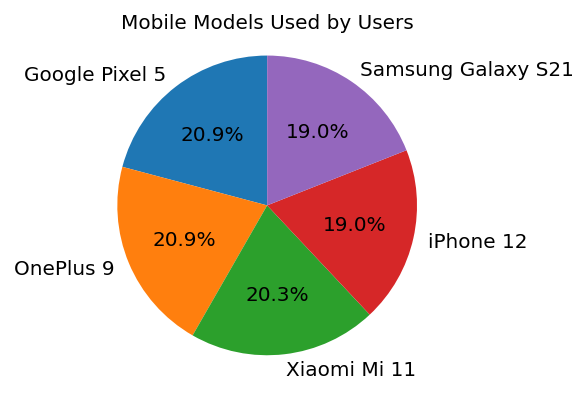

In [12]:
plot_models_pie(model_counts, models)

In [13]:
data_usage = df['Data Usage (MB/day)']
screen_on_time = df['Screen On Time (hours/day)']

In [14]:
# Storing some basic statistics in variables
age = df['Age']
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]
skewness_age = stats.skew(df['Age'])
kurtosis_age = stats.kurtosis(df['Age'])

In [15]:
# Plotting Histogram
def plot_hist(age):
    plt.figure(dpi = 144, figsize = (6, 4))
    plt.hist(age, bins=10, color = 'purple', edgecolor='black', alpha = 0.7)
    # Plot mean, median, and mode as vertical lines
    plt.axvline(mean_age, color='red', linestyle = '--', linewidth = 2, label=f'Mean: {mean_age:.2f}')
    plt.axvline(median_age, color='green', linestyle='--', linewidth = 2, label = f'Median: {median_age:.2f}')
    plt.axvline(mode_age, color = 'blue', linestyle = '--', linewidth = 2, label = f'Mode: {mode_age}')    
    # Move skewness and kurtosis text to bottom right
    plt.text(0.95, 0.05, f'Skewness: {skewness_age:.2f}', 
         transform = plt.gca().transAxes, ha = 'right', va = 'bottom', fontsize = 10, color = 'black')
    plt.text(0.95, 0.10, f'Kurtosis: {kurtosis_age:.2f}', 
         transform = plt.gca().transAxes, ha = 'right', va = 'bottom', fontsize = 10, color = 'black')
    # Add labels and title
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Age Distribution', fontsize = 10)
    plt.legend()
    plt.show()

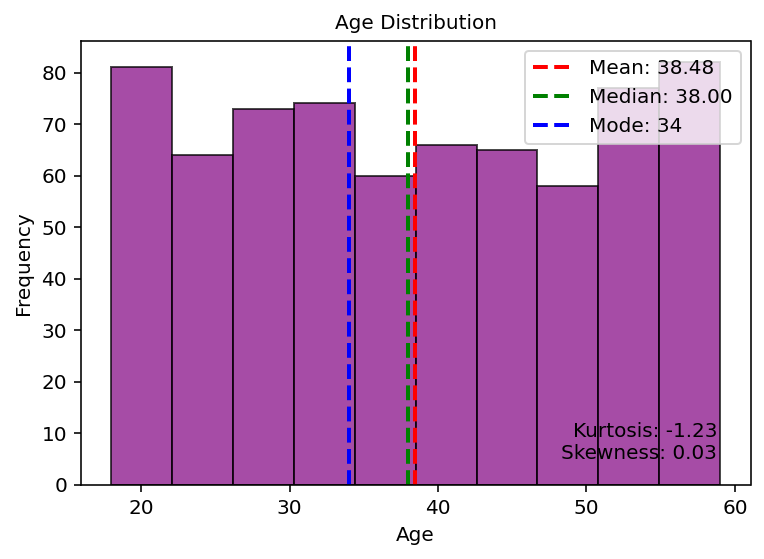

In [16]:
plot_hist(age)

In [17]:
# Storing specific column values in variables
app_usage = df['App Usage Time (min/day)']
battery_drain = df['Battery Drain (mAh/day)']
battery_drain

User ID
1      1872
2      1331
3       761
4      1676
5      1367
       ... 
696    1082
697    1965
698     942
699     431
700    1306
Name: Battery Drain (mAh/day), Length: 700, dtype: int64

In [18]:
# Function to plot scatter plot
def app_usage_vs_battery_drain_scatter(app_usage, battery_drain):
    #Creates a line graph of age against on screen time
    plt.figure(dpi = 144, figsize = (4 ,4))  
    plt.scatter(battery_drain, app_usage, alpha = 0.7, color = 'purple') 
    #Setting title and labels
    plt.title('Battery Drain vs App Usage', fontsize = 10)
    plt.xlabel('Battery Drain')  
    plt.ylabel('App Usage') 
    plt.grid(True) 
    plt.tight_layout()  
    plt.show()

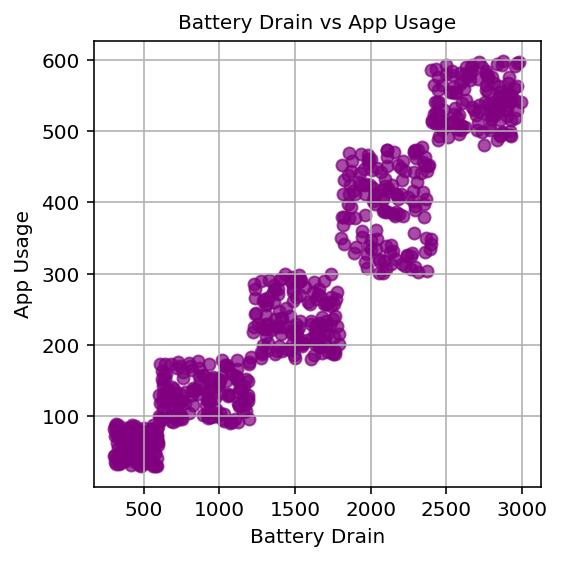

In [19]:
 app_usage_vs_battery_drain_scatter(app_usage, battery_drain)

In [20]:
# Calculate the average number of apps installed for each mobile type
avg_drain_time = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean()
avg_drain_time

Device Model
Google Pixel 5        1475.676056
OnePlus 9             1523.849624
Samsung Galaxy S21    1504.571429
Xiaomi Mi 11          1528.876712
iPhone 12             1589.513699
Name: Battery Drain (mAh/day), dtype: float64

In [21]:
# Plotting bar graph
def plot_avg_drain_time_by_mobile_type_matplotlib(avg_drain_time):
    plt.figure(dpi = 144, figsize = (8, 4))  
    plt.bar(avg_drain_time.index, avg_drain_time.values, color='purple')
     # Calculate the mean of the average drain time
    mean_drain_time = avg_drain_time.mean()    
    # Plot horizontal line for mean
    plt.axhline(y = mean_drain_time, color = 'red', linestyle = '--', linewidth = 2)    
    # Add label for the mean line manually
    plt.text(len(avg_drain_time) - 3, mean_drain_time + 12, f'Mean: {mean_drain_time:.2f}', 
             color = 'red', fontsize = 10, ha = 'left', va = 'bottom')
    #Setting title and labels
    plt.title('Average drain time by Mobile Type', fontsize = 10)  
    plt.xlabel('Mobile Type')  
    plt.ylabel('Average Drain Time(mAh/day)')  
    plt.grid(axis = 'y')  
    plt.tight_layout() 
    plt.show()

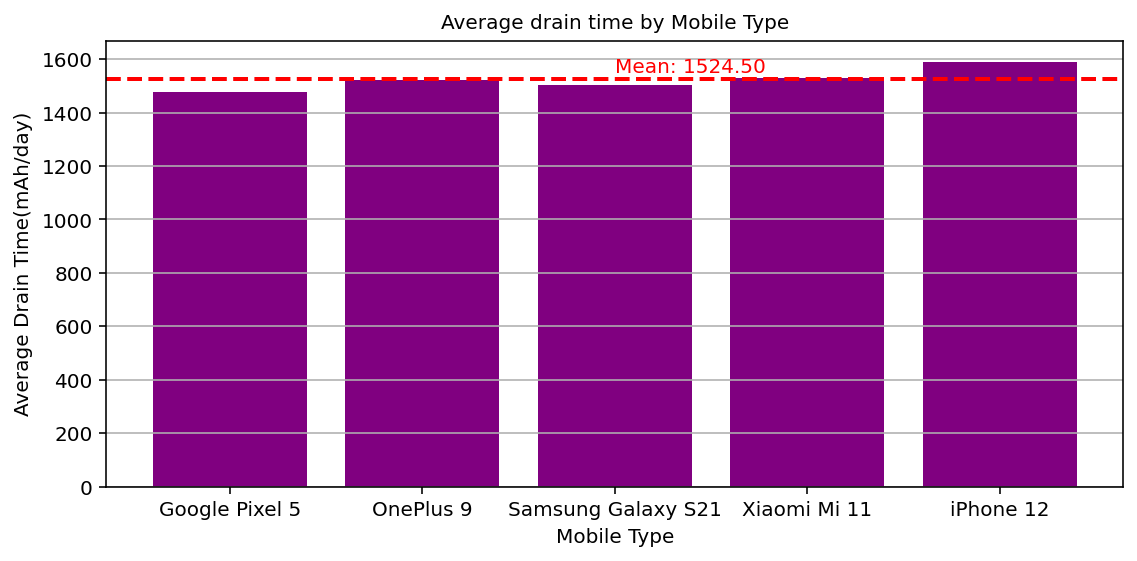

In [22]:
# Plotting the bar chart
plot_avg_drain_time_by_mobile_type_matplotlib(avg_drain_time)

In [23]:
# Correlation Matrix using Pearson Method
numeric_df.corr()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
App Usage Time (min/day),1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498
Screen On Time (hours/day),0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581
Battery Drain (mAh/day),0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587
Number of Apps Installed,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255
Data Usage (MB/day),0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734
Age,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563
User Behavior Class,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000


In [24]:
# Correlation Matrix using Kendall Method
numeric_df.corr(method = 'kendall')

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
App Usage Time (min/day),1.000000,0.802080,0.802628,0.799307,0.802173,0.003123,0.895897
Screen On Time (hours/day),0.802080,1.000000,0.803092,0.803045,0.802910,0.012664,0.899296
Battery Drain (mAh/day),0.802628,0.803092,1.000000,0.805603,0.798919,-0.005234,0.895126
Number of Apps Installed,0.799307,0.803045,0.805603,1.000000,0.812176,0.000200,0.900443
Data Usage (MB/day),0.802173,0.802910,0.798919,0.812176,1.000000,-0.006017,0.895221
Age,0.003123,0.012664,-0.005234,0.000200,-0.006017,1.000000,-0.002186
User Behavior Class,0.895897,0.899296,0.895126,0.900443,0.895221,-0.002186,1.000000


In [25]:
# Plottting Heatmaps
def plot_mobile_correlation(numeric_df, method):    
    fig, ax = plt.subplots(dpi = 144, figsize = (8, 4))
    mask = np.triu(np.ones_like(numeric_df.corr()))
    sns.heatmap(numeric_df.corr(method = method), ax = ax, vmin = -1, vmax = 1,
                cmap = 'RdBu', annot = True, mask = mask)
    # Rorating labels for readability
    plt.xticks(rotation=45, ha='right')
    # Setting title of heatmap
    plt.title(f" Heatmap Using {method.capitalize()} Correlation Matrix", fontsize = 10)
    plt.show()
    return

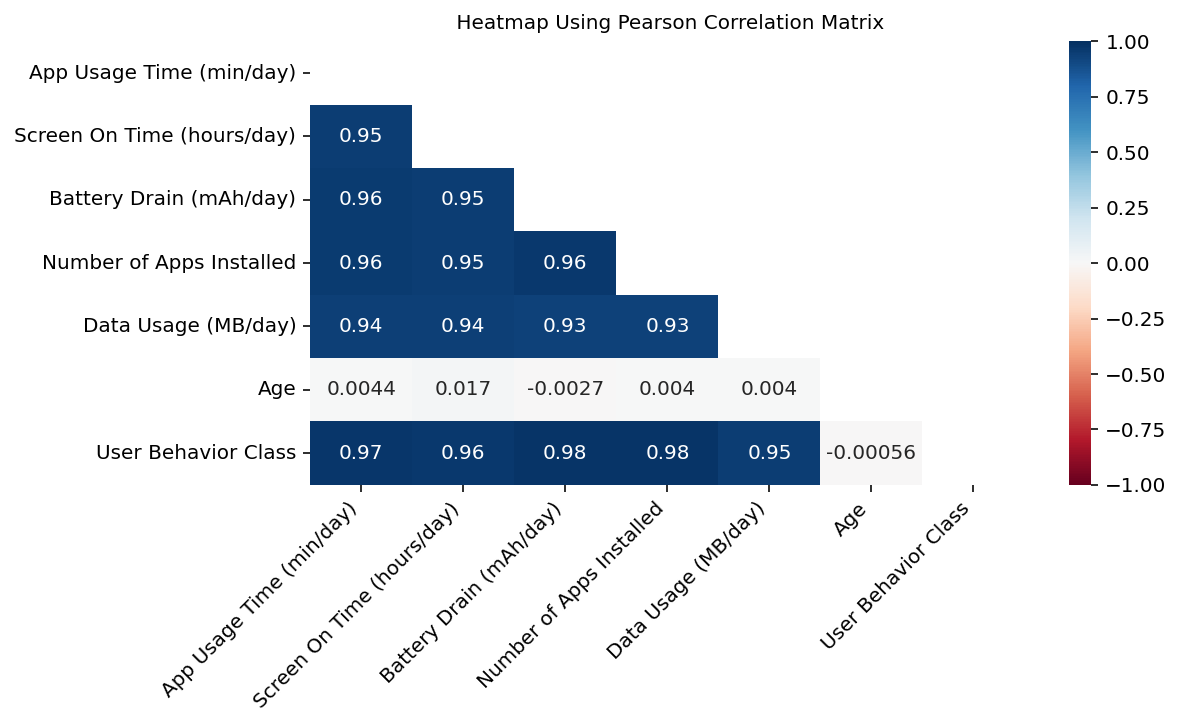

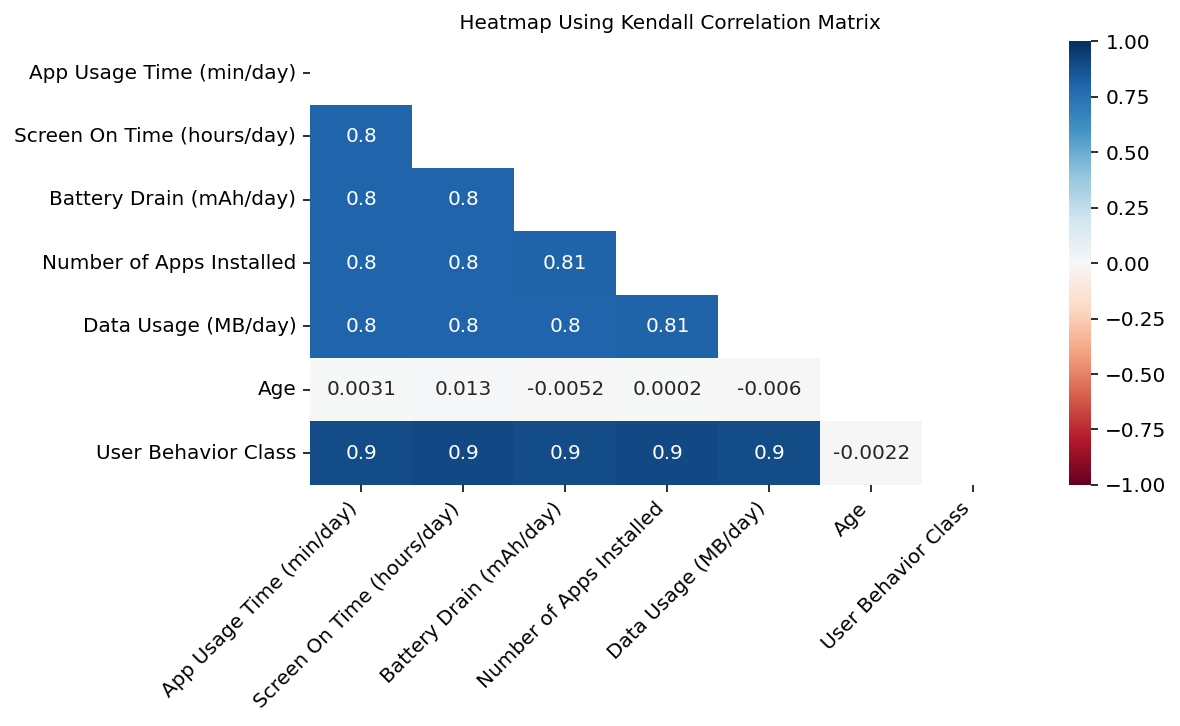

In [26]:
plot_mobile_correlation(numeric_df, 'pearson')
plot_mobile_correlation(numeric_df, 'kendall')